In [98]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [99]:
from scripts import project_functions # This is called a relative import
dff = project_functions.load_and_process('/Users/Khalidmahmoud/Desktop/DATA301/project-group61-project/data/raw/world-happiness-report.csv')
dff

Country name  year  Life Ladder  Log GDP per capita  \
0                     Finland  2020        7.889              10.750   
1                     Finland  2018        7.858              10.783   
2                     Finland  2017        7.788              10.768   
3                     Finland  2019        7.780              10.792   
4                 Switzerland  2019        7.694              11.136   
..                        ...   ...          ...                 ...   
639               Afghanistan  2018        2.694               7.692   
640                  Zimbabwe  2019        2.694               7.950   
641  Central African Republic  2016        2.693               6.785   
642               Afghanistan  2017        2.662               7.697   
643               Afghanistan  2019        2.375               7.697   

     Social support  Healthy life expectancy at birth  \
0             0.962                              72.1   
1             0.962                              71.9   
2             0.964                              71.8   
3             0.937                              72.0   
4             0.949                              74.4   
..              ...                               ...   
639           0.508                              52.6   
640           0.759                              56.2   
641           0.290                              44.9   
642           0.491                              52.8   
643           0.420                              52.4   

     Freedom to make life choices  Generosity  Perceptions of corruption  
0                           0.962      -0.116                      0.164  
1                           0.938      -0.127                      0.199  
2                           0.962      -0.002                      0.192  
3                           0.948      -0.052                      0.195  
4                           0.913       0.036                      0.294  
..                            ...         ...                        ...  
639                         0.374      -0.094                      0.928  
640                         0.632      -0.064                      0.831  
641                         0.624       0.033                      0.859  
642                         0.427      -0.121                      0.954  
643                         0.394      -0.108                      0.924  

[644 rows x 9 columns]

In [100]:
dff.shape

(644, 9)

In [101]:

print("The first 5 values are: ",dff.head())



The first 5 values are:    Country name  year  Life Ladder  Log GDP per capita  Social support  \
0      Finland  2020        7.889              10.750           0.962   
1      Finland  2018        7.858              10.783           0.962   
2      Finland  2017        7.788              10.768           0.964   
3      Finland  2019        7.780              10.792           0.937   
4  Switzerland  2019        7.694              11.136           0.949   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              72.1                         0.962      -0.116   
1                              71.9                         0.938      -0.127   
2                              71.8                         0.962      -0.002   
3                              72.0                         0.948      -0.052   
4                              74.4                         0.913       0.036   

   Perceptions of corruption  
0                 

In [102]:
print("The columns in this dataframe are: ",dff.columns)

The columns in this dataframe are:  Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [103]:
dff.nunique(axis=0)
dff.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

year Life Ladder Log GDP per capita Social support  \
count   644.000000  644.000000         644.000000     644.000000   
mean   2017.836957    5.551879           9.466618       0.816502   
std       1.346547    1.104355           1.145036       0.118613   
min    2016.000000    2.375000           6.635000       0.290000   
25%    2017.000000    4.741750           8.552500       0.747500   
50%    2018.000000    5.570500           9.573000       0.842000   
75%    2019.000000    6.309000          10.460000       0.912000   
max    2020.000000    7.889000          11.648000       0.985000   

      Healthy life expectancy at birth Freedom to make life choices  \
count                       633.000000                   641.000000   
mean                         64.799485                     0.789106   
std                           6.847179                     0.118495   
min                          44.900000                     0.304000   
25%                          59.600000                     0.717000   
50%                          66.400000                     0.812000   
75%                          69.600000                     0.883000   
max                          77.100000                     0.985000   

       Generosity Perceptions of corruption  
count  643.000000                604.000000  
mean    -0.011194                  0.729303  
std      0.153852                  0.189425  
min     -0.335000                  0.047000  
25%     -0.122000                  0.676750  
50%     -0.036000                  0.792500  
75%      0.080000                  0.856250  
max      0.679000                  0.969000

In [150]:
print("The unique countries in this dataframe are listed below: \n",dff['Country name'].unique())

The unique countries in this dataframe are listed below: 
 ['Finland' 'Switzerland' 'Denmark' 'Norway' 'Iceland' 'Netherlands'
 'Canada' 'Luxembourg' 'Sweden' 'Austria' 'New Zealand' 'Israel' 'Germany'
 'Australia' 'Ireland' 'United Kingdom' 'Costa Rica' 'Bahrain'
 'United Arab Emirates' 'Czech Republic' 'United States' 'Belgium' 'Malta'
 'Mexico' 'France' 'Slovenia' 'Guatemala' 'Uruguay' 'Chile' 'Panama'
 'Saudi Arabia' 'Slovakia' 'Italy' 'Taiwan Province of China' 'Spain'
 'Croatia' 'Nicaragua' 'El Salvador' 'Estonia' 'Brazil' 'Argentina'
 'Kosovo' 'Uzbekistan' 'Lithuania' 'Singapore' 'Colombia' 'Jamaica'
 'Cyprus' 'Kazakhstan' 'Philippines' 'Kyrgyzstan' 'Poland' 'Serbia'
 'Mauritius' 'Latvia' 'Trinidad and Tobago' 'Romania' 'Ecuador' 'Japan'
 'Kuwait' 'Portugal' 'Thailand' 'Hungary' 'Honduras'
 'Bosnia and Herzegovina' 'Mongolia' 'Dominican Republic' 'Peru'
 'South Korea' 'Greece' 'Bolivia' 'Turkmenistan' 'Russia' 'Pakistan'
 'Tajikistan' 'Belarus' 'Benin' 'Moldova' 'Paraguay' 'Chin

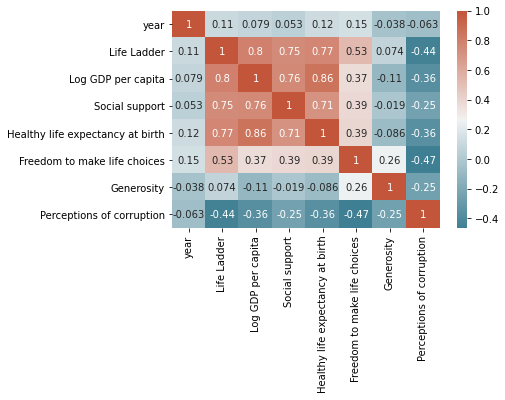

In [105]:
# calculate correlation matrix
corr = dff.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

# below, obvious highest are seen between: 
# Log GDP per capita and life ladder,log gdp per capita and social support, log gdp per capita and healthy life expectancey at birth 
# the lowest are seen between year and the rest of the variables

Text(0.5, 1.0, 'Life Ladder VS Log GDP per Capita Plot')

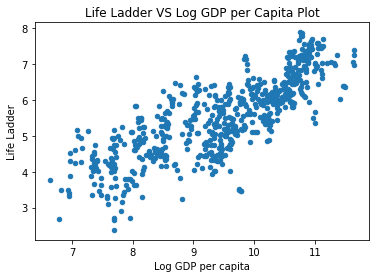

In [106]:
dff.plot(kind='scatter', x='Log GDP per capita', y='Life Ladder')
plt.title("Life Ladder VS Log GDP per Capita Plot")

#correlation above is corroborated: increase in GDP correlates to an increase in life ladder, vice versa.

Text(0.5, 1.0, 'Freedom to Make Life Choices VS Life Ladder Plot')

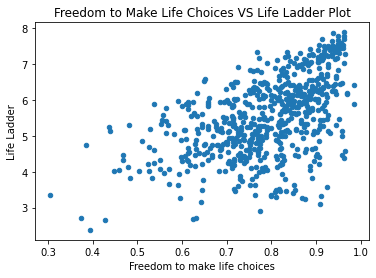

In [107]:
dff.plot(kind='scatter', x='Freedom to make life choices', y='Life Ladder')
plt.title("Freedom to Make Life Choices VS Life Ladder Plot")
#correlation above is corroborated: increase in Freedom to make life choices to an increase in life ladder, vice versa.

Text(0.5, 1.0, 'Year VS Log GDP per Capita Plot')

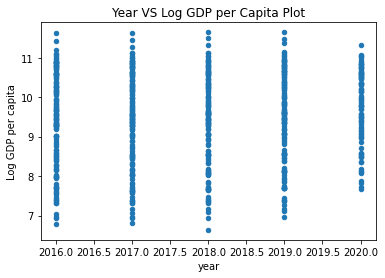

In [108]:
dff.plot(kind='scatter', x='year', y='Log GDP per capita')
plt.title("Year VS Log GDP per Capita Plot")
# the max and min gdp per capita are seen at 2018 
# the peak gdp per capita is at 2018, while the highest min and lowest max is at 2020

/opt/miniconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Boxplot of Life Ladder grouped by year')

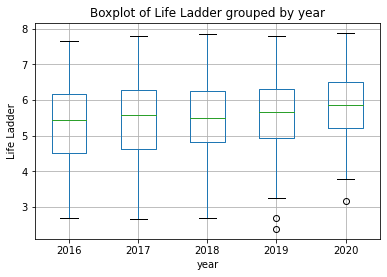

In [109]:
ax = dff.boxplot('Life Ladder', 'year')
ax.set_ylabel("Life Ladder")
plt.suptitle('')
plt.title("Boxplot of Life Ladder grouped by year")

#highest min and max of life ladder are seen in 2020


/opt/miniconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Boxplot of Healthy life expectancy at birth grouped by year')

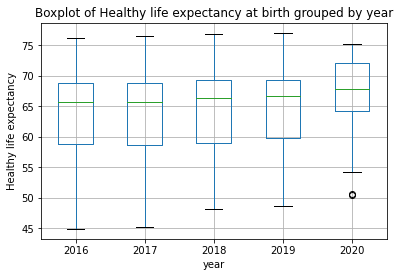

In [110]:
ax2= dff.boxplot('Healthy life expectancy at birth', 'year')
ax2.set_ylabel("Healthy life expectancy")
plt.suptitle('')
plt.title("Boxplot of Healthy life expectancy at birth grouped by year")
#average healthy life expectancy is relatively constant and is highest in 2020

/opt/miniconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Boxplot of Log GDP per capita grouped by year')

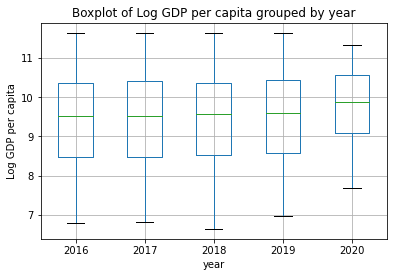

In [111]:
ax3 = dff.boxplot('Log GDP per capita', 'year')
ax3.set_ylabel("Log GDP per capita")
plt.suptitle('')
plt.title("Boxplot of Log GDP per capita grouped by year")
#average  log gdp per capita, as supported by the boxplot, is highest in 2020, and the min is highest there as well

/opt/miniconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Boxplot of Generousity grouped by year')

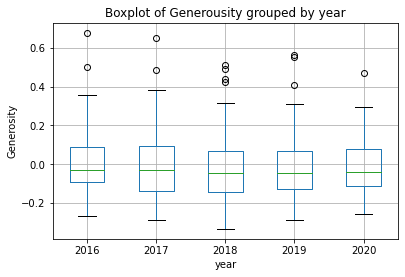

In [112]:
ax4= dff.boxplot('Generosity', 'year')
ax4.set_ylabel("Generosity")
plt.suptitle('')
plt.title("Boxplot of Generousity grouped by year")
#average generosity is highest in 2017, and remains constant, seeing a slight increase in 2020
#highest generosity score is iin 2020, and has since steadily declined

In [113]:
ProfileReport(dff).to_notebook_iframe()

/opt/miniconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Boxplot of Social support grouped by year')

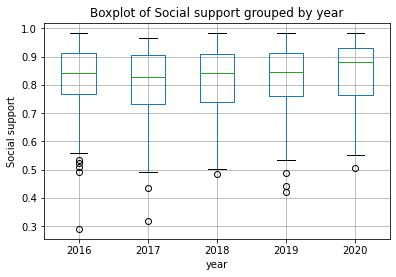

In [114]:
ax5 = dff.boxplot('Social support', 'year')
ax5.set_ylabel("Social support")
plt.suptitle('')
plt.title("Boxplot of Social support grouped by year")

Text(0.5, 1.0, 'Social support VS Life Ladder Bar Graph')

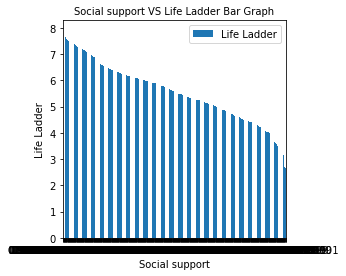

In [147]:

axes = dff.plot.bar(x = "Social support", y = "Life Ladder" ,rot=0, subplots=True, fontsize = 10, figsize=(4, 4))
plt.ylabel('Life Ladder', fontsize=10)
plt.suptitle('')
plt.title('Social support VS Life Ladder Bar Graph', fontsize=10)






Text(0.5, 1.0, 'Log GDP per capita VS Life Ladder Bar Graph')

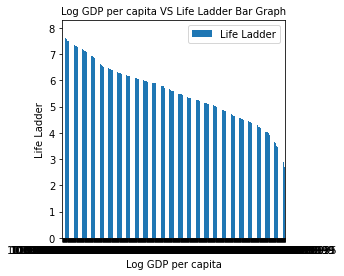

In [145]:
axes = dff.plot.bar(x = "Log GDP per capita", y = "Life Ladder" ,rot=0, subplots=True, fontsize = 10, figsize=(4, 4))
plt.ylabel('Life Ladder', fontsize=10)
plt.suptitle('')
plt.title('Log GDP per capita VS Life Ladder Bar Graph', fontsize=10)

# 1. What variables within this dataset have the highest potential of interdependence?
### From the dataset, Social support, Life Ladder, and Log GDP have the highest potential of interdependence. Looking at the correlation data on line 123 and 115 in the EDA, plotting social support against life ladder gives a strong linear correlation of 0.75/1. This shows that an increase in social support is likely to correspond to, or be followed by a net increase in  the life ladder. When collecting this data, the question posed  in order to gage the level social support was whether the person had donated to any charities in the last month. Possible reasons for this include the fact that social support through charity might result in more people being able to afford better food, medication, shelter, and nutrition, which would have a net positive effect on the the national life ladder scores. This increase in life quality or life ladder scores would lead to an increase in GDP, because of a net increased productivity, and entrepreneurship, as supported by the correlation data to be mentioned. The correlation data between GDP and life ladder in line 115, supported by lines 116 and 123, suggest a strong correlation between the two, with a correlation coefficient of 0.8. The visible increase as seen in the dot plot in line 116 further supports this.  Additionally, the box plots in line 121 and 127 show that the highest average GDP and highest average social support for all countries occur in the same year, in 2020. Furthermore, the lowest average GDP and lowest average social support also occur in the same year, 2018, further supporting the initial claim of the three variables having the highest potential of interdependent. Finally, a bar graph cross-analysis of Life ladder with both Log GDP per capita and Social support shows that both variables have a similar relationship with Life ladder. From the bar graphs, it is evident that over the years 2015 to 2020, as social support and Log GDP per capita decrease, the average Life ladder for most of the countries does as well. This, along with the aforementioned information further suggests their interdependence. 


### Some limitations to this dataset include the fact that the contributions of a regular donator who donated over a month ago might be neglected, hence underestimating the true value, or that of one who donates once in a while might skew the data, and subsequent result in an overestimate of the true value. However, because the these confounding variables have opposite effects, and a similar likelihood of occurring within the random sample, the results would ideally be holistically skewed, which might affect the values, but not the trend, allowing the above inference to stand regardless.


In [148]:
dff.to_csv('/Users/Khalidmahmoud/Desktop/DATA301/project-group61-project/data/processed/processed.csv')

In [151]:
dff 

Country name  year  Life Ladder  Log GDP per capita  \
0                     Finland  2020        7.889              10.750   
1                     Finland  2018        7.858              10.783   
2                     Finland  2017        7.788              10.768   
3                     Finland  2019        7.780              10.792   
4                 Switzerland  2019        7.694              11.136   
..                        ...   ...          ...                 ...   
639               Afghanistan  2018        2.694               7.692   
640                  Zimbabwe  2019        2.694               7.950   
641  Central African Republic  2016        2.693               6.785   
642               Afghanistan  2017        2.662               7.697   
643               Afghanistan  2019        2.375               7.697   

     Social support  Healthy life expectancy at birth  \
0             0.962                              72.1   
1             0.962                              71.9   
2             0.964                              71.8   
3             0.937                              72.0   
4             0.949                              74.4   
..              ...                               ...   
639           0.508                              52.6   
640           0.759                              56.2   
641           0.290                              44.9   
642           0.491                              52.8   
643           0.420                              52.4   

     Freedom to make life choices  Generosity  Perceptions of corruption  
0                           0.962      -0.116                      0.164  
1                           0.938      -0.127                      0.199  
2                           0.962      -0.002                      0.192  
3                           0.948      -0.052                      0.195  
4                           0.913       0.036                      0.294  
..                            ...         ...                        ...  
639                         0.374      -0.094                      0.928  
640                         0.632      -0.064                      0.831  
641                         0.624       0.033                      0.859  
642                         0.427      -0.121                      0.954  
643                         0.394      -0.108                      0.924  

[644 rows x 9 columns]

In [163]:
dhigh = dff.iloc[:322]
dhigh

Country name  year  Life Ladder  Log GDP per capita  \
0               Finland  2020        7.889              10.750   
1               Finland  2018        7.858              10.783   
2               Finland  2017        7.788              10.768   
3               Finland  2019        7.780              10.792   
4           Switzerland  2019        7.694              11.136   
..                  ...   ...          ...                 ...   
317  Dominican Republic  2017        5.605               9.725   
318            Bulgaria  2020        5.598               9.991   
319         Philippines  2017        5.594               9.002   
320              Russia  2017        5.579              10.166   
321             Moldova  2016        5.578               9.300   

     Social support  Healthy life expectancy at birth  \
0             0.962                              72.1   
1             0.962                              71.9   
2             0.964                              71.8   
3             0.937                              72.0   
4             0.949                              74.4   
..              ...                               ...   
317           0.894                              65.5   
318           0.916                              67.2   
319           0.851                              61.8   
320           0.896                              63.9   
321           0.837                              63.6   

     Freedom to make life choices  Generosity  Perceptions of corruption  
0                           0.962      -0.116                      0.164  
1                           0.938      -0.127                      0.199  
2                           0.962      -0.002                      0.192  
3                           0.948      -0.052                      0.195  
4                           0.913       0.036                      0.294  
..                            ...         ...                        ...  
317                         0.855      -0.121                      0.760  
318                         0.818      -0.004                      0.901  
319                         0.926      -0.141                      0.711  
320                         0.731      -0.145                      0.862  
321                         0.557      -0.047                      0.969  

[322 rows x 9 columns]

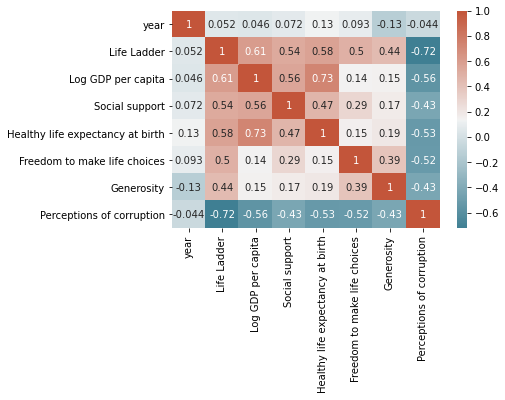

In [165]:
corr = dhigh.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


In [166]:
dlow = dff.iloc[322:644]
dlow

Country name  year  Life Ladder  Log GDP per capita  \
322                  Mongolia  2019        5.563               9.418   
323                   Bolivia  2020        5.559               8.998   
324                   Belarus  2017        5.553               9.814   
325                  Pakistan  2016        5.549               8.394   
326                   Croatia  2018        5.536              10.224   
..                        ...   ...          ...                 ...   
639               Afghanistan  2018        2.694               7.692   
640                  Zimbabwe  2019        2.694               7.950   
641  Central African Republic  2016        2.693               6.785   
642               Afghanistan  2017        2.662               7.697   
643               Afghanistan  2019        2.375               7.697   

     Social support  Healthy life expectancy at birth  \
322           0.946                              62.5   
323           0.805                              64.2   
324           0.900                              65.8   
325           0.627                              57.7   
326           0.910                              70.2   
..              ...                               ...   
639           0.508                              52.6   
640           0.759                              56.2   
641           0.290                              44.9   
642           0.491                              52.8   
643           0.420                              52.4   

     Freedom to make life choices  Generosity  Perceptions of corruption  
322                         0.711       0.149                      0.873  
323                         0.877      -0.054                      0.868  
324                         0.621      -0.122                      0.654  
325                         0.634       0.095                      0.793  
326                         0.691      -0.151                      0.925  
..                            ...         ...                        ...  
639                         0.374      -0.094                      0.928  
640                         0.632      -0.064                      0.831  
641                         0.624       0.033                      0.859  
642                         0.427      -0.121                      0.954  
643                         0.394      -0.108                      0.924  

[322 rows x 9 columns]

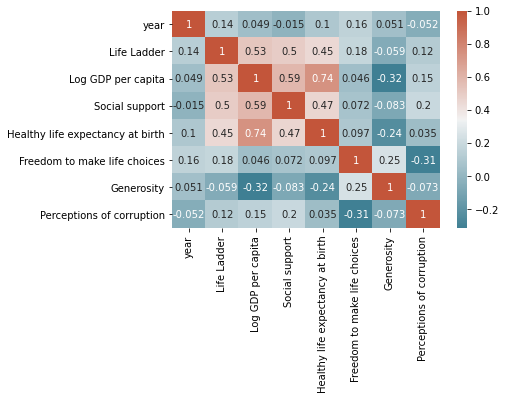

In [167]:
corr = dlow.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


In [168]:
dhigh.to_csv('/Users/Khalidmahmoud/Desktop/DATA301/project-group61-project/data/processed/dhigh.csv')
dlow.to_csv('/Users/Khalidmahmoud/Desktop/DATA301/project-group61-project/data/processed/dlow.csv')